## Anomaly detection

We have identified a few instances having the same images but belonging to different rooms. 

To avoid containing noisy data in our dataset we aim to identify and visualize this data.

In [1]:
from widedeep.data.places import  *
from widedeep.data.display import *
from widedeep.utils import *

import collections
import random
import mahotas as mh
import matplotlib.pyplot as plt
%matplotlib inline

# Whatever parameters introduced here
alexnet_specs = DataSpec(batch_size=256,
                             scale_size=256,
                             crop_size=227,
                             isotropic=False)
# Create queue system
producer = DataProducer(path=get_processed_data(),
                            data_spec=alexnet_specs,
                            image_root=get_airbnb_img_root())

# List of rooms, paths, ids, etc
rooms, paths, ids, official = producer._process_dataset()

We see that room identifiers are not repeated within the dataset:

Let's get those images appearing more than once.

In [2]:
counts = collections.Counter(ids)
greater = [k for (k, v) in counts.iteritems() if v > 1]

Track rooms containing the repeated images

In [3]:
# Get rooms duplicated images belong to
# Entry v with key d in dictionary: rooms containing image d
rooms_conflicted = {}
for (i, v) in enumerate(ids):
    if v in greater:
        room_c = rooms[i]
        if v in rooms_conflicted:
            rooms_conflicted[v].append(room_c)
        else:
            rooms_conflicted[v] = [room_c]
            
print('Number of duplicated images detected: {}'.format(len(rooms_conflicted)))

Number of duplicated images detected: 391


Now let's visualize some of the anomalies detected.

In [7]:
def show_image_metadata(data, img_root, room_id):
    """ Shows image, tags and whether it is an official picture"""
    print('--> Showing room {}'.format(room_id))
    print('-------> Image metadata:\n')
    print(data[room_id])
    print('-------> Images:\n')
    paths = data[room_id]['img_paths']
    abs_paths = [os.path.join(img_root, i) for i in paths]
    plot_image_grid(abs_paths, nrows=5, fig_size=(12, 6))

# Load info from dataset resulting from data_preprocessing notebook
data = pd.read_json(get_processed_data()).transpose()

# Show random instance
inst = random.randint(0, len(rooms_conflicted)-1)
print('Instance selected shows conflict between {} rooms'.format(len(rooms_conflicted[inst])))

Instance selected shows conflict between 2 rooms


Let's see first room information

--> Showing room 7232632
-------> Image metadata:

accommodates                                                             3
bathrooms                                                                8
bedrooms                                                                 1
cancelation_policy                                                  strict
cleaning_fee                                                             0
host_id                                                            9025180
host_is_superhost                                                     True
images                   {"0": [25, false], "1": [26, false], "2": [27,...
img_paths                [7000000_to_7999999/7200000_to_7299999/7230000...
m_discount                                                              18
minstay                                                                  1
neighborhood                                                   Sant Antoni
neighborhood_overview                            

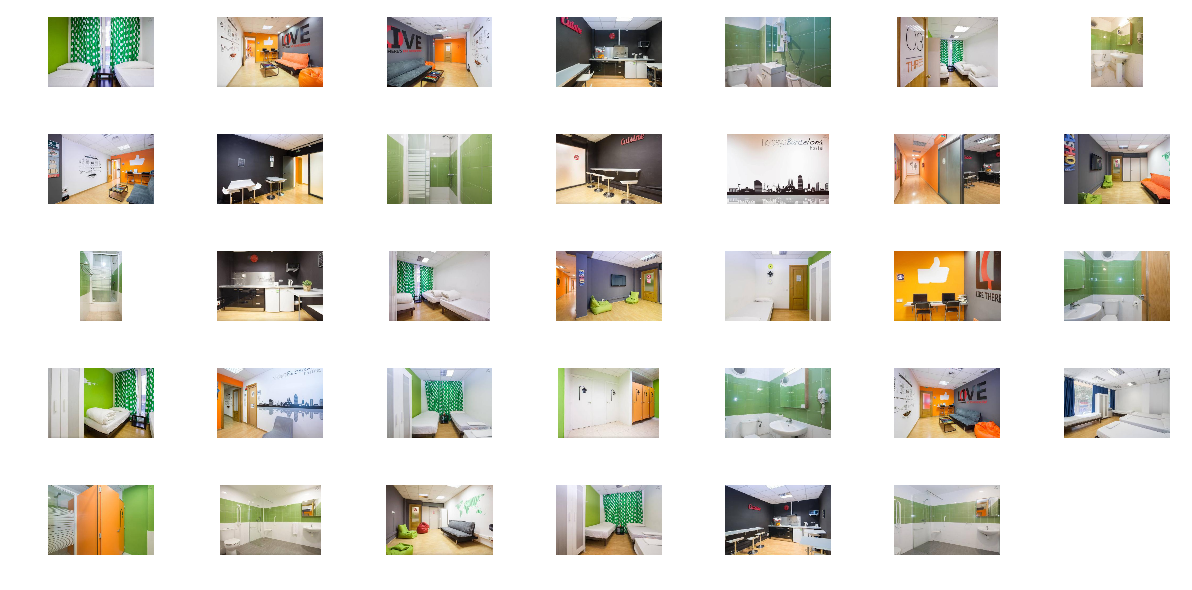

In [8]:
show_image_metadata(data, get_airbnb_img_root(), rooms_conflicted[inst][0])

Now let's visualize the second room in conflict

In [9]:
show_image_metadata(data, get_airbnb_img_root(), rooms_conflicted[inst][1])

--> Showing room 9808908
-------> Image metadata:

accommodates                                                             2
bathrooms                                                                2
bedrooms                                                                 1
cancelation_policy                                                moderate
cleaning_fee                                                             0
host_id                                                           31678816
host_is_superhost                                                     True
images                   {"0": [39, true], "1": [40, true], "2": [41, t...
img_paths                [1000000_to_1999999/1400000_to_1499999/1440000...
m_discount                                                               0
minstay                                                                  1
neighborhood                                            la Sagrada Família
neighborhood_overview                            

TODO: decide what to do